# 1.0 The basics of double/debiased machine learning

In the following we provide a brief summary of and motivation to the double machine learning (DML) framework and show how the corresponding methods provided by the DoubleML package can be applied. For details we refer to Chernozhukov et al. (2018).

We consider the following partially linear model

\begin{align}\begin{aligned}y_i = \theta d_i + g_0(x_i) + \zeta_i, & &\zeta_i \sim \mathcal{N}(0,1),\\d_i = m_0(x_i) + v_i, & &v_i \sim \mathcal{N}(0,1),\end{aligned}\end{align}


with covariates $x_i \sim \mathcal{N}(0, \Sigma)$, where $\Sigma$ is a matrix with entries $\Sigma_{kj} = 0.7^{|j-k|}$. We are interested in performing valid inference on the causal parameter $\theta$. The true parameter $\theta$ is set to 0.5 in our simulation experiment.

The nuisance functions are given by:

\begin{align}\begin{aligned}m_0(x_i) &= x_{i,1} + \frac{1}{4}  \frac{\exp(x_{i,3})}{1+\exp(x_{i,3})},\\g_0(x_i) &= \frac{\exp(x_{i,1})}{1+\exp(x_{i,1})} + \frac{1}{4} x_{i,3}.\end{aligned}\end{align}

In [3]:
#install.packages("DoubleML")
library(DoubleML)
set.seed(1234)
n_rep = 1000
n_obs = 200
n_vars = 150
alpha = 0.5

data = list()
for (i_rep in seq_len(n_rep)) {
    data[[i_rep]] = make_plr_CCDDHNR2018(alpha=alpha, n_obs=n_obs, dim_x=n_vars,
                                          return_type="data.frame")
}

# 1.2 OLS estimation

For comparison we run a simple OLS regression of $Y$ on $D$ and $X$. As we will see in the following, due to the considered high-dimensional setting the variance of the unregularized OLS estimates is higher in comparison to the double machine learning estimates and therefore the estimates are also less efficient.

In [9]:
#install.packages("ggplot2")
library(ggplot2)

est_ols = function(df) {
    ols = stats::lm(y ~ 1 +., df)
    theta = coef(ols)["d"]
    return(theta)
}



In [10]:
# to speed up the illustration we hard-code the simulation results
theta_ols = c(0.607697047, 0.517030100, 0.589652643, 0.472635435, 0.664240859, 0.493210806, 0.539281370, 0.314045648, 0.610190305, 0.381273649, 0.449613657, 0.591410296, 0.475418067, 0.453225281, 0.626975360, 0.133881932, 0.688402884, 0.584272744, 0.400995390, 0.508011546, 0.652163232, 0.450246441, 0.481371297, 0.387925003, 0.339319744, 0.455211505, 0.393108971, 0.508044365, 0.570043632, 0.504138457, 0.649995372, 0.573181791, 0.450204168, 0.580155929, 0.559124755, 0.319166483, 0.619605243, 0.559989398, 0.497594152, 0.516462187, 0.261960663, 0.204280903, 0.669016644, 0.250055866, 0.647017006, 0.700356932, 0.478880881, 0.490902426, 0.576694200, 0.497799178, 0.654611430, 0.761003814, 0.527117173, 0.576149401, 0.268216840, 0.427497472, 0.558284193, 0.465285351, 0.367369535, 0.358950841, 0.353317416, 0.551121683, 0.476083529, 0.349086468, 0.556019829, 0.242773180, 0.462672952, 0.661802570, 0.652935787, 0.476783262, 0.550197421, 0.605953210, 0.698217648, 0.516145147, 0.474546204, 0.592796175, 0.595952626, 0.499719871, 0.470920166, 0.635882392, 0.516079626, 0.452397659, 0.714190650, 0.215255273, 0.347379010, 0.583471048, 0.524819957, 0.608911706, 0.423763166, 0.291108689, 0.607837973, 0.541538378, 0.632318639, 0.528820038, 0.619982779, 0.570696185, 0.245974669, 0.411828619, 0.595350425, 0.547821041, 0.726634349, 0.395092155, 0.470682777, 0.246821370, 0.570568009, 0.451889824, 0.831386706, 0.474180783, 0.685116161, 0.615667439, 0.412768647, 0.420461956, 0.268491533, 0.431516537, 0.352601742, 0.592253366, 0.368416831, 0.374213036, 0.490669696, 0.374423707, 0.769901750, 0.513044163, 0.439884666, 0.560922008, 0.629981460, 0.321926767, 0.398217909, 0.444816873, 0.321365131, 0.272833380, 0.093068976, 0.445214485, 0.298279565, 0.748386201, 0.154777280, 0.617161610, 0.318668352, 0.654297770, 0.325757680, 0.343033384, 0.643452659, 0.429671013, 0.435013955, 0.507684008, 0.477399282, 0.596309464, 0.785548288, 0.727160279, 0.327009532, 0.320665984, 0.240790080, 0.517340592, 0.429096939, 0.358122017, 0.446044994, 0.581608198, 0.390101013, 0.500437297, 0.594003137, 0.475476934, 0.525995116, 0.631689118, 0.707119548, 0.462592407, 0.542751202, 0.390147315, 0.511128783, 0.415721616, 0.493532013, 0.508752438, 0.280580913, 0.633977202, 0.456987706, 0.263429085, 0.427346822, 0.631988342, 0.529404022, 0.356613732, 0.544055219, 0.486378192, 0.577250067, 0.308349783, 0.434198591, 0.759832976, 0.826757693, 0.589255696, 0.372214909, 0.634219883, 0.720108064, 0.556854714, 0.550057225, 0.275968020, 0.577875894, 0.384650579, 0.642032161, 0.470298911, 0.495913354, 0.553910651, 0.517680868, 0.438144890, 0.325649166, 0.742172310, 0.513262336, 0.372671139, 0.715375153, 0.455077113, 0.653043284, 0.491809178, 0.328426865, 0.463785639, 0.339955421, 0.630678263, 0.533009719, 0.481001903, 0.529705874, 0.543791494, 0.496534577, 0.192647347, 0.145075102, 0.632269149, 0.338828882, 0.443917462, 0.295798356, 0.323562898, 0.525703243, 0.477445901, 0.550358089, 0.468644795, 0.414003964, 0.464400822, 0.180006584, 0.267829894, 0.537841890, 0.573499595, 0.401085692, 0.590516135, 0.575580475, 0.265872644, 0.527654550, 0.638358999, 0.545591043, 0.402938792, 0.376629718, 0.249059834, 0.639295634, 0.533255230, 0.772053877, 0.556304177, 0.463626961, 0.581361233,
      0.620637149, 0.333450659, 0.582466901, 0.421818439, 0.396012165, 0.384697314, 0.453416556, 0.366778974, 0.340375550, 0.267581312, 0.670849391, 0.727770265, 0.772749482, 0.438892589, 0.474494838, 0.370620526, 0.459266969, 0.747379921, 0.609076462, 0.738891475, 0.353488457, 0.545334880, 0.448778578, 0.703513317, 0.472304254, 0.315757951, 0.483654087, 0.454779120, 0.706079914, 0.670826331, 0.416380101, 0.604091197, 0.329262944, 0.720038419, 0.237782551, 0.496501223, 0.431067052, 0.428069445, 0.370304254, 0.480437628, 0.529264620, 0.495586792, 0.592154256, 0.669026555, 0.325348666, 0.527771797, 0.532025341, 0.438769788, 0.551898543, 0.463978466, 0.600295300, 0.531212791, 0.512854079, 0.627400905, 0.519508323, 0.458166808, 0.439592332, 0.516245391, 0.566304094, 0.592501171, 0.558243707, 0.268560020, 0.565398339, 0.618714551, 0.508838195, 0.660381899, 0.445473556, 0.435312543, 0.512301291, 0.257373982, 0.542377362, 0.427538306, 0.573145587, 0.458964794, 0.598656675, 0.681245473, 0.618432741, 0.379811057, 0.794911453, 0.331247062, 0.471548075, 0.500438701, 0.464223659, 0.504887335, 0.490951199, 0.751013297, 0.527585367, 0.551770873, 0.364502446, 0.569470880, 0.473540560, 0.823152096, 0.468991845, 0.457594544, 0.513934163, 0.519542386, 0.622697949, 0.608237799, 0.420012253, 0.559972124, 0.405123891, 0.445030586, 0.536857451, 0.433109716, 0.765927280, 0.751127949, 0.368974915, 0.567233309, 0.626027630, 0.386810086, 0.524774302, 0.442167054, 0.450210959, 0.713608885, 0.462550932, 0.659955300, 0.689413483, 0.382259590, 0.580821434, 0.282600974, 0.242440264, 0.386691118, 0.505693034, 0.152611856, 0.398385325, 0.473344934, 0.191897966, 0.316695260, 0.629784515, 0.274051878, 0.655870346, 0.535790488, 0.548050952, 0.632355263, 0.304193602, 0.605364088, 0.313958760, 0.614444992, 0.311886064, 0.397354327, 0.348304983, 0.692821996, 0.548204787, 0.466375294, 0.384260162, 0.598834776, 0.131651827, 0.775434060, 0.507745382, 0.495182858, 0.624167391, 0.421378417, 0.636080402, 0.396019932, 0.450640880, 0.444656038, 0.419600313, 0.531778187, 0.764677617, 0.359989103, 0.440272838, 0.420530515, 0.701544603, 0.582921387, 0.711803958, 0.644888211, 0.405292471, 0.710975237, 0.540956133, 0.403959810, 0.487418324, 0.461411210, 0.206262550, 0.555388326, 0.624785136, 0.614971417, 0.303040224, 0.369155344, 0.598749138, 0.613769413, 0.624180808, 0.743259561, 0.623789919, 0.495058489, 0.757678344, 0.545722785, 0.271155910, 0.470625056, 0.314716811, 0.392130282, 0.616851404, 0.480906333, 0.465538674, 0.786489402, 0.508033589, 0.380625856, 0.507087669, 0.457253001, 0.413843144, 0.307455347, 0.657527799, 0.601619008, 0.354791429, 0.397159635, 0.547725875, 0.591647021, 0.371593053, 0.312816249, 0.295159359, 0.613657807, 0.667318196, 0.573041019, 0.627212476, 0.594918699, 0.522951574, 0.578996755, 0.411323834, 0.696456006, 0.902523993, 0.504887743, 0.388866278, 0.542039989, 0.641256381, 0.067813714, 0.453649751, 0.553396858, 0.485506701, 0.439271561, 0.783773120, 0.655390205, 0.284032005, 0.394359328, 0.567734225, 0.411265874, 0.512826534, 0.667667737, 0.494348457, 0.754588872, 0.524358107, 0.371814862, 0.609810028, 0.398656232, 0.427543064, 0.412278778, 0.466612248, 0.508781321, 0.594168362, 0.763906439, 0.435792328, 0.627318604,
      0.40128283, 0.56432264, 0.74302951, 0.64531519, 0.43428408, 0.54253650, 0.68675909, 0.54610904, 0.31143410, 0.66361247, 0.32512856, 0.66572909, 0.40574241, 0.42634426, 0.53028845, 0.34059186, 0.44227985, 0.32888353, 0.38161937, 0.61764474, 0.69864362, 0.63056189, 0.51969777, 0.58412973, 0.36162152, 0.43894783, 0.55070409, 0.61962881, 0.46346635, 0.44584711, 0.60291852, 0.54722201, 0.32348962, 0.40724896, 0.60074412, 0.42378812, 0.53906840, 0.45414918, 0.59115562, 0.40338927, 0.50182640, 0.48084020, 0.90263159, 0.60790853, 0.43655100, 0.55461189, 0.36397835, 0.58646397, 0.58908656, 0.59499250, 0.41971334, 0.55403415, 0.48406753, 0.51324153, 0.43795068, 0.34147378, 0.65615424, 0.45282946, 0.62798226, 0.68307839, 0.34736619, 0.27418656, 0.42805168, 0.56468975, 0.60789152, 0.59062508, 0.49657063, 0.25934902, 0.46669355, 0.37904474, 0.78088127, 0.27779921, 0.41089186, 0.50652618, 0.41487435, 0.42474508, 0.28787443, 0.68609987, 0.40486436, 0.58286324, 0.69899550, 0.69881034, 0.25414322, 0.50056500, 0.51191289, 0.64195381, 0.38464824, 0.67050520, 0.79119204, 0.66121900, 0.66231864, 0.49102378, 0.52755161, 0.37539878, 0.49396307, 0.56514515, 0.64396712, 0.58492056, 0.51141379, 0.46374323, 0.61322274, 0.80605473, 0.19625903, 0.59275028, 0.59315605, 0.51476527, 0.55586894, 0.62692145, 0.85075221, 0.22599649, 0.59567280, 0.42571674, 0.57336632, 0.47226078, 0.42181200, 0.61536354, 0.57852012, 0.56960488, 0.67248512, 0.57019950, 0.72583961, 0.39351170, 0.45864071, 0.43103856, 0.50799773, 0.43716181, 0.62919779, 0.48415089, 0.65312876, 0.65647993, 0.46407403, 0.33089356, 0.37438204, 0.37497296, 0.68611434, 0.44876905, 0.18054140, 0.26400354, 0.47987279, 0.68171662, 0.51093778, 0.59986890, 0.30665047, 0.55657833, 0.28716139, 0.50404870, 0.57869547, 0.71382251, 0.23780666, 0.74193622, 0.46573069, 0.61869736, 0.50879341, 0.49846749, 0.52458970, 0.60034101, 0.43890792, 0.35354176, 0.62410794, 0.47428766, 0.67168489, 0.49854470, 0.58477878, 0.49254631, 0.53694318, 0.51833287, 0.61090065, 0.55870688, 0.32501375, 0.48465602, 0.60557801, 0.65122122, 0.58698711, 0.62996355, 0.79432546, 0.29601187, 0.37071731, 0.13453090, 0.73666178, 0.60634991, 0.43765982, 0.47549840, 0.47018984, 0.71373865, 0.62206020, 0.50556747, 0.32655121, 0.73705585, 0.80461499, 0.43967304, 0.51218814, 0.52506201, 0.74933665, 0.31768015, 0.41512105, 0.36382194, 0.31293697, 0.22764901, 0.45876455, 0.58077527, 0.34656751, 0.50245026, 0.54243241, 0.29990733, 0.40296793, 0.51772611, 0.53623182, 0.65568813, 0.41566544, 0.52366193, 0.68709611, 0.49724011, 0.63823942, 0.57515874, 0.62556556, 0.54638853, 0.24648101, 0.45804953, 0.37131632, 0.60435690, 0.47646836, 0.51087791, 0.60959009, 0.41817240, 0.30132056, 0.75619161, 0.51393051, 0.51373308, 0.71556140, 0.30710997, 0.56009148, 0.41724733, 0.45965438, 0.56950917, 0.60834196, 0.33933807, 0.63838966, 0.83730647, 0.64062354, 0.41755781, 0.41221805, 0.62107756, 0.38217892, 0.65674740, 0.62836579, 0.41161122, 0.45185653, 0.45227430, 0.76045195, 0.41824912,
      0.4810422212,  0.6320157397,  0.5921241513,  0.5766938495,  0.3247115737,  0.2703896827,  0.4185879263,  0.7592021572,  0.5332725283,  0.6542020920,  0.6328260609,  0.4924104186,  0.4036824886,  0.5118722903,  0.3665288504,  0.3426986470,  0.4015860810,  0.5457729851,  0.5617826399,  0.2457019273,  0.6232354343,  0.6198344522,  0.3336892970,  0.1571112376,  0.5302578543,  0.5896195835,  0.5045548852,  0.1038594426,  0.4827105478,  0.4625021003,  0.6622099645,  0.3906701212,  0.7855141344,  0.4739854013,  0.5974381160,  0.4956047962,  0.3884149227,  0.4735520726,  0.5569370070,  0.3885771241,  0.6921680637,  0.5307979053,  0.4478790041,  0.2521418794,  0.3653833498,  0.4644757108,  0.4920318549,  0.4954566442,  0.5570176214,  0.6502358567,  0.4753184434,  0.4594743395,  0.5482583307,  0.6277798133,  0.6981686206,  0.6187655987,  0.5965462283,  0.5297084261,  0.4279360901,  0.1817626048,  0.2111365738,  0.3798967352,  0.3077189146,  0.5074858352,  0.3020465101,  0.5585563587,  0.4669719417,  0.6258874623,  0.4788181254,  0.6031830563,  0.4192175248,  0.8315681795,  0.7514063990,  0.5105236249,  0.3613152818,  0.6270093033,  0.3523742755,  0.6425440918,  0.3457825041,  0.5677974519,  0.4554885768,  0.3853195932,  0.6944759319,  0.7279363416,  0.6307611619,  0.7266577792,  0.4691833321,  0.4364350803,  0.2740016735,  0.3683804337,  0.3656010469,  0.4847634576,  0.2635796128,  0.4708807769,  0.4251331735,  0.5961937080,  0.7359779525,  0.3960925525,  0.7544216824,  0.4553743674,  0.6277900183,  0.5604000678,  0.4123944519,  0.6697466795,  0.4542655060,  0.6726582582,  0.5178095934,  0.5336656003,  0.7294123494,  0.5737851442,  0.4375373221,  0.5169854604,  0.5647916007,  0.5281703047,  0.4947867579,  0.6033878160,  0.4348261019,  0.6622941134,  0.5181854618,  0.4387885592,  0.5840565870,  0.7078765595,  0.4293114362,  0.5289573078,  0.6357464673,  0.4019810076,  0.4917680291,  0.5141892462,  0.5742675024,  0.6187602570,  0.4924936579,  0.4631088728,  0.2970657923,  0.6183528546,  0.5926991307,  0.3422548365,  0.4630764069,  0.3745998673,  0.5779962672,  0.5943075376,  0.4863586326,  0.5702442510,  0.8110391970,  0.4637084427,  0.7044627148,  0.5141194878,  0.4610210390,  0.4283283243,  0.2124464880,  0.3241674624,  0.8986303116,  0.6650904154,  0.4358467530,  0.3623206466,  0.3086154653,  0.4073734322,  0.3954349869,  0.7140152024,  0.5475629076,  0.3772126235,  0.6549230244,  0.7222120900,  0.6293562288,  0.7074974891,  0.3862122773,  0.5190522868,  0.5086677172,  0.4566653024,  0.6198970108,  0.5534357746,  0.6403650132,  0.4776773409,  0.7993807655,  0.3316596983,  0.5347903151, -0.0073145945,  0.7505758880,  0.7721696602,  0.4786098286,  0.7733355763,  0.4292071198,  0.5524794380,  0.4738381907,  0.4532365578,  0.3864576996,  0.3154620027,  0.4125880055,  0.7336049906,  0.7191266612,  0.4174040603,  0.3966765475,  0.4200732061,  0.5158521385,  0.5179938216,  0.6002159767,  0.6655745967,  0.3359239334,  0.2815784591,  0.3850891300,  0.7365577578,  0.3621555499,  0.6444221888,  0.5666878213,  0.5194972086,  0.7835955228,  0.8471366245,  0.6936365628,  0.2793957788,  0.5781979405,  0.3851868684,  0.5080473573,  0.5638570327,  0.2292095223,  0.5795689538,  0.4331280258,  0.4737607122,  0.5558744047,  0.6336470554,  0.5559408316,  0.4499369967,  0.6496618608,  0.6065969525,  0.3587967152,  0.6153089390,  0.5826552712,  0.6817230843,  0.4902681535,  0.4304772497,  0.3568752494,  0.4414055507,  0.5421596269,  0.6616140050,  0.5645489367,  0.4600724670,  0.5220926673,  0.2790394247,  0.7390774505,  0.3820212110,  0.5281986424,  0.6567182815,  0.4522734618,  0.3908002136,  0.7182619596,  0.6261977128,  0.2436503360,  0.3906712092,  0.4287648988,  0.5611551354,  0.7583334768,  0.3711041209)

d 
0 


Warning message:
"Removed 47 rows containing non-finite values (stat_density)."


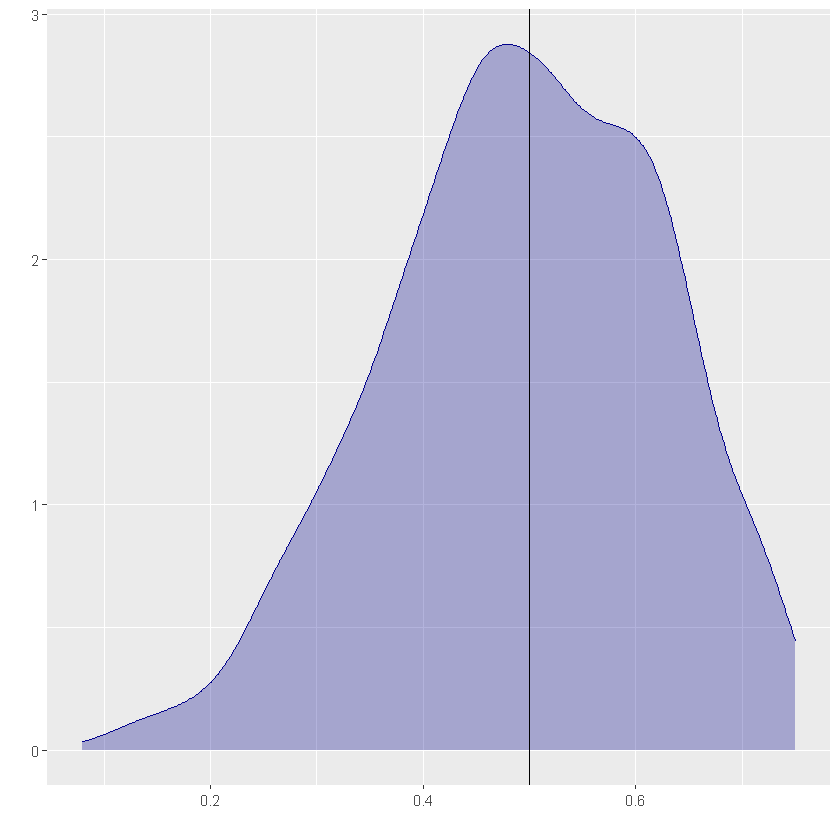

In [35]:

# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
#for (i_rep in seq_len(n_rep)) {
for (i_rep in seq_len(1)) {
  df = data[[i_rep]]
  this_theta = est_ols(df)
  print(abs(theta_ols[i_rep] - this_theta))
  theta_ols[i_rep] = this_theta
}

g_ols = ggplot(data.frame(theta_ols), aes(x = theta_ols)) +
            geom_density(fill = "dark blue", alpha = 0.3, color = "dark blue") +
            geom_vline(aes(xintercept = alpha), col = "black") +
            xlim(c(0.08, 0.75)) + xlab("") + ylab("")
g_ols

# 1.3 Regularization bias in simple ML-approaches

Naive inference that is based on a direct application of machine learning methods to estimate the causal parameter,$\theta$ , is generally invalid. The use of machine learning methods introduces a bias that arises due to regularization. A simple ML approach is given by randomly splitting the sample into two parts. On the auxiliary sample indexed by $i \in I^C$ the nuisance function $g_0(X)$ is estimated with an ML method, for example a random forest learner. Given the estimate $\hat{g}_0(X)$, the final estimate of $\theta$ is obtained as ($n=N/2$) using the other half of observations indexed with $i \in I$


\begin{align}\begin{aligned}\hat{\theta} = \left(\frac{1}{n} \sum_{i\in I} D_i^2\right)^{-1} \frac{1}{n} \sum_{i\in I} D_i (Y_i - \hat{g}_0(X_i)).\end{aligned}\end{align}

In [18]:
#install.packages("ranger")

non_orth_score = function(y, d, g_hat, m_hat, smpls) {
 u_hat = y - g_hat
 psi_a = -1*d*d
 psi_b = d*u_hat
 psis = list(psi_a = psi_a, psi_b = psi_b)
 return(psis)
}
library(mlr3)
library(mlr3learners)
library(data.table)
lgr::get_logger("mlr3")$set_threshold("warn")
set.seed(1111)

learner = lrn("regr.ranger", num.trees=100, mtry=n_vars, min.node.size=2, max.depth=5)
ml_m = learner$clone()
ml_g = learner$clone()

# to speed up the illustration we hard-code the simulation results
theta_nonorth = theta_nonorth = c(0.335140973, 0.419119658, 0.543364882, 0.465531595, 0.489423796, 0.580690927, 0.446899757, 0.272292296, 0.240826014, 0.365608710, 0.268312379, 0.354473099, 0.385506555, 0.615247222, 0.463371670, 0.410046844, 0.544959995, 0.489229912, 0.457527626, 0.614892818, 0.338072758, 0.394127768, 0.276357084, 0.433449188, 0.249084049, 0.528947106, 0.451120107, 0.327303152, 0.546307385, 0.395934562, 0.301388718, 0.239982004, 0.530202292, 0.169856178, 0.322835980, 0.065608845, 0.154554350, 0.430897491, 0.424487779, 0.324143676, 0.389261597, 0.272135966, 0.351868551, 0.256792473, 0.504886282, 0.474738538, 0.384538245, 0.483251852, 0.363105174, 0.216916587, 0.294053708, 0.479088598, 0.269570359, 0.377226775, 0.437593329, 0.225371600, 0.470220118, 0.580390685, 0.304737611, 0.305733674, 0.354465325, 0.436580536, 0.445360886, 0.368723539, 0.157181386, 0.155664995, 0.464140152, 0.480734551, 0.362887864, 0.337695182, 0.642324202, 0.310090948, 0.349702691, 0.305153800, 0.316219058, 0.381051853, 0.320910647, 0.469491087, 0.424923136, 0.429822780, 0.275509449, 0.323183059, 0.555469839, 0.191757655, 0.236563643, 0.431688361, 0.428128667, 0.352089478, 0.099148330, 0.444152504, 0.394307625, 0.255398535, 0.438946752, 0.253313216, 0.112699448, 0.477861515, 0.458580858, 0.583866474, 0.340893368, 0.591232974, 0.346205252, 0.543514451, 0.460809329, 0.231994475, 0.284534860, 0.328665723, 0.316603063, 0.364736497, 0.326819423, 0.360088787, 0.437105307, 0.340068129, 0.437790456, 0.293644690, 0.256570227, 0.391332290, 0.379705449, 0.345781442, 0.192708760, 0.495761272, 0.357445752, 0.289328987, 0.271279462, 0.246514418, 0.321481385, 0.547511147, 0.323289625, 0.421790101, 0.361704227, 0.183561036, 0.240601590, 0.373376260, 0.418223589, 0.234931680, 0.298725451, 0.334964767, 0.445040143, 0.411404746, 0.296765746, 0.342425930, 0.439660376, 0.449429060, 0.350347796, 0.501114430, 0.141751964, 0.460308677, 0.308125041, 0.412797756, 0.348937055, 0.320860597, 0.501787986, 0.402516515, 0.307775795, 0.265250174, 0.249370199, 0.237803476, 0.490491083, 0.392297291, 0.476605166, 0.596921313, 0.329334145, 0.168666169, 0.514855555, 0.361304938, 0.458823659, 0.218943774, 0.190659814, 0.399702615, 0.496828233, 0.364189324, 0.355013117, 0.347135933, 0.303363453, 0.388743993, 0.351564875, 0.461375525, 0.304952081, 0.305842312, 0.371825913, 0.529941260, 0.369612156, 0.227549238, 0.476589099, 0.409674606, 0.648042086, 0.454762542, 0.325161264, 0.474848225, 0.238840882, 0.246974012, 0.281007912, 0.485805697, 0.349186121, 0.240147788, 0.400154659, 0.350860610, 0.321397152, 0.329311833, 0.412791960, 0.416868304, 0.365255439, 0.224506192, 0.627734333, 0.315886799, 0.187565232, 0.321475886, 0.277727795, 0.298443734, 0.490262959, 0.260242409, 0.312206710, 0.352033429, 0.330884704, 0.258199280, 0.430870900, 0.325387453, 0.366884342, 0.388394987, 0.332531847, 0.456149765, 0.480522342, 0.198383637, 0.200533915, 0.269881924, 0.339918216, 0.453854936, 0.473168756, 0.460025119, 0.284768638, 0.360963578, 0.210442939, 0.299954368, 0.389141673, 0.361433498, 0.443818155, 0.380874367, 0.315574954, 0.514698977, 0.369786833, 0.342736404, 0.496349510, 0.539101645, 0.301455561, 0.273359613, 0.470802282, 0.435284567, 0.515617885, 0.284359396, 0.311403925, 0.324005567,
          0.42139206, 0.25604031, 0.36201789, 0.10846016, 0.41784835, 0.34505290, 0.35388876, 0.74150699, 0.16133690, 0.29388264, 0.47603740, 0.26673708, 0.36747984, 0.32719126, 0.42509806, 0.35977158, 0.33368013, 0.50825836, 0.43838805, 0.44730481, 0.34552361, 0.35458993, 0.23337476, 0.26513718, 0.47182588, 0.44153584, 0.47829997, 0.26140131, 0.25369408, 0.38922793, 0.15108407, 0.21647681, 0.43478364, 0.38368258, 0.36937969, 0.39530397, 0.47783846, 0.47734570, 0.23662392, 0.44670463, 0.48737923, 0.48664646, 0.37433932, 0.40340501, 0.42819694, 0.50312924, 0.26157946, 0.31198968, 0.39955912, 0.33634231, 0.33144015, 0.31181757, 0.33995580, 0.43817849, 0.30326375, 0.31102104, 0.32270600, 0.35016055, 0.40434170, 0.46299218, 0.48458540, 0.32291477, 0.38090308, 0.37289522, 0.49450332, 0.37622246, 0.26345370, 0.21200119, 0.20610146, 0.40286913, 0.30702282, 0.24507251, 0.34157918, 0.34007658, 0.32387305, 0.35049316, 0.37436835, 0.34540160, 0.48407376, 0.46762908, 0.37074398, 0.30789111, 0.35586455, 0.34952500, 0.50174516, 0.37325996, 0.27937008, 0.40428039, 0.33630248, 0.29045981, 0.36996854, 0.38606302, 0.29149853, 0.47210709, 0.51180091, 0.29678938, 0.35412552, 0.39716491, 0.28452926, 0.26660583, 0.46892162, 0.30673355, 0.45047690, 0.42939064, 0.45773370, 0.32853933, 0.46402431, 0.31983450, 0.29105138, 0.18750465, 0.32012184, 0.37348488, 0.37709558, 0.30038336, 0.35647914, 0.51807477, 0.20440505, 0.25672821, 0.27799653, 0.35506732, 0.34781610, 0.50966358, 0.35900531, 0.51515573, 0.41425917, 0.32255047, 0.43121963, 0.49713000, 0.30640585, 0.38909694, 0.29476253, 0.40916563, 0.52696848, 0.49826146, 0.38664316, 0.35355361, 0.28926478, 0.45166077, 0.35449890, 0.34640176, 0.36247956, 0.49048200, 0.30049993, 0.36595049, 0.46345042, 0.40938684, 0.43713582, 0.47727673, 0.37483511, 0.47145995, 0.31764164, 0.37748722, 0.40966739, 0.36564739, 0.68316261, 0.30395606, 0.35009298, 0.38868867, 0.42508677, 0.19270357, 0.31445686, 0.35898081, 0.54066015, 0.55762859, 0.39909256, 0.38553908, 0.42839512, 0.31360412, 0.43517347, 0.35676783, 0.31794530, 0.33347841, 0.47641606, 0.46035693, 0.35144907, 0.45348246, 0.43848581, 0.31090602, 0.42554573, 0.32571953, 0.29110146, 0.42773931, 0.47804920, 0.36678412, 0.56647980, 0.35099766, 0.42244372, 0.24605076, 0.32744448, 0.36130732, 0.24298803, 0.37705319, 0.27561302, 0.41546887, 0.42277679, 0.35905028, 0.52871705, 0.31363500, 0.35694760, 0.20090708, 0.39972094, 0.32729766, 0.38047097, 0.30324345, 0.50077595, 0.42323764, 0.45558074, 0.37947002, 0.40284181, 0.30131654, 0.35846660, 0.27345362, 0.21105024, 0.43491772, 0.27462259, 0.44970539, 0.33962746, 0.47221672, 0.38079351, 0.38404269, 0.36638005, 0.45460183, 0.41530605, 0.51348554, 0.41357115, 0.38602219, 0.39641486, 0.36338585, 0.53908472, 0.40178164, 0.37625833, 0.34680086, 0.38400230, 0.32646933, 0.43481472, 0.40057902, 0.46015932, 0.35390319, 0.49936377, 0.23254776, 0.23256492, 0.26699012, 0.41438752, 0.59448102, 0.49043671, 0.25764383, 0.28265227, 0.49938059, 0.20976461, 0.45252510,
          0.40100550, 0.24138738, 0.51419442, 0.30912931, 0.19270926, 0.46076875, 0.30703976, 0.47925088, 0.24845422, 0.37799021, 0.47495314, 0.36871868, 0.36715992, 0.48703219, 0.37048658, 0.13218894, 0.47467607, 0.33963194, 0.37156872, 0.34689429, 0.34391573, 0.40845588, 0.32799294, 0.57346577, 0.10573375, 0.45642240, 0.37851526, 0.22431294, 0.23692439, 0.33849143, 0.27381426, 0.39965198, 0.41201772, 0.33977959, 0.41796550, 0.39697713, 0.52148446, 0.18902439, 0.34751249, 0.42338701, 0.32613592, 0.50108900, 0.32613300, 0.36330014, 0.39497015, 0.33845313, 0.28011569, 0.43751187, 0.41213643, 0.24179264, 0.29566622, 0.43867378, 0.36155961, 0.49627929, 0.45379851, 0.24529567, 0.42839232, 0.12603140, 0.51068248, 0.39044941, 0.22842060, 0.28604811, 0.37920624, 0.39488357, 0.49142644, 0.19303242, 0.30509616, 0.35419436, 0.57922498, 0.34204373, 0.39049205, 0.27700611, 0.46974557, 0.37977411, 0.30986615, 0.45385451, 0.34549566, 0.44764169, 0.30396429, 0.26560635, 0.46688682, 0.34718550, 0.32563316, 0.48156394, 0.37788893, 0.45803404, 0.33401036, 0.49210787, 0.36889110, 0.37402951, 0.40458266, 0.34404844, 0.39699806, 0.42347582, 0.39383998, 0.35038586, 0.41919659, 0.47936964, 0.40647672, 0.49388580, 0.49383058, 0.43054761, 0.24525336, 0.29581170, 0.37046297, 0.49712392, 0.32128505, 0.23845768, 0.48502925, 0.33209492, 0.25236158, 0.33548368, 0.31222920, 0.11141084, 0.32674611, 0.26787342, 0.27662515, 0.48644238, 0.21554285, 0.35735214, 0.47788589, 0.39048312, 0.18714603, 0.32364833, 0.39804068, 0.46353421, 0.42251671, 0.34956771, 0.19073000, 0.37400850, 0.21161721, 0.53906612, 0.49232736, 0.48419373, 0.39627618, 0.22227510, 0.22329599, 0.38301612, 0.43001814, 0.40520558, 0.36975743, 0.32526198, 0.33220777, 0.27990257, 0.44065939, 0.45800741, 0.30765543, 0.35109396, 0.24058013, 0.15791243, 0.14863150, 0.38827008, 0.42837730, 0.46465828, 0.54745820, 0.34374755, 0.46476362, 0.44240261, 0.29813557, 0.36687965, 0.40317123, 0.40857152, 0.37164974, 0.41226479, 0.54474676, 0.19999817, 0.34599613, 0.15690204, 0.37319497, 0.49078806, 0.26886547, 0.44214884, 0.39244426, 0.46218008, 0.48172675, 0.57592097, 0.36458435, 0.41422416, 0.35969788, 0.41980495, 0.37529218, 0.30871578, 0.41929812, 0.43366044, 0.48366402, 0.32165728, 0.18604071, 0.41272197, 0.49723981, 0.33804899, 0.17234326, 0.27562049, 0.43505835, 0.21643307, 0.21458139, 0.25736381, 0.28476760, 0.31527156, 0.36744670, 0.37825692, 0.50709172, 0.43219751, 0.18977635, 0.26327341, 0.17310781, 0.38639482, 0.47189400, 0.41601084, 0.20671635, 0.56230153, 0.41836663, 0.39796858, 0.32829044, 0.30277060, 0.44775291, 0.32816917, 0.27935160, 0.35015803, 0.58615249, 0.34562539, 0.29355900, 0.28298933, 0.50509005, 0.34783965, 0.38829562, 0.37445260, 0.36001475, 0.34546856, 0.45336849, 0.33916374, 0.34239627, 0.32355265, 0.41653694, 0.47690166, 0.41311561, 0.43205490, 0.23447482, 0.41054831, 0.46526172, 0.30751118, 0.36952833, 0.26967795, 0.42790667, 0.44590686, 0.38504515, 0.36849803, 0.45946597, 0.34570813, 0.37983734, 0.39496048,
          0.502255777, 0.478909263, 0.323189120, 0.374278793, 0.270686466, 0.277117398, 0.417217659, 0.426015414, 0.456790541, 0.322189137, 0.544548505, 0.253578860, 0.322975900, 0.362919840, 0.307711447, 0.364220168, 0.359471201, 0.373375671, 0.243844850, 0.290917892, 0.597136684, 0.254036144, 0.234842559, 0.455002949, 0.415709324, 0.443531265, 0.299394678, 0.273685693, 0.339751460, 0.290479625, 0.418674294, 0.367702267, 0.361132947, 0.447685742, 0.498754389, 0.270269135, 0.295705938, 0.484246007, 0.311986189, 0.304280505, 0.406538045, 0.370420053, 0.456776894, 0.457377674, 0.296940275, 0.377566228, 0.367587126, 0.427966186, 0.324805655, 0.420154277, 0.385518258, 0.434303736, 0.484742044, 0.420268053, 0.543945352, 0.614640782, 0.181089220, 0.538398740, 0.172360743, 0.401025849, 0.399125170, 0.301969996, 0.458273275, 0.352292564, 0.428755908, 0.281922745, 0.166868747, 0.383126737, 0.461700376, 0.321581217, 0.294979582, 0.645734516, 0.480530595, 0.369117806, 0.447472411, 0.367004384, 0.325281361, 0.372054625, 0.559420414, 0.420927754, 0.441013621, 0.268351322, 0.471931821, 0.377414999, 0.398822036, 0.586611520, 0.398019082, 0.332722226, 0.404158484, 0.335375695, 0.613275439, 0.442884130, 0.153235309, 0.331616205, 0.391264091, 0.357352172, 0.413816771, 0.408433901, 0.419759530, 0.228831898, 0.242195246, 0.325805978, 0.177510323, 0.287290644, 0.423608328, 0.346624498, 0.398904327, 0.312968780, 0.385049936, 0.355245850, 0.353788611, 0.622340341, 0.347298462, 0.487055228, 0.347159344, 0.642501454, 0.286065916, 0.272343803, 0.341502439, 0.502706623, 0.423043196, 0.392224835, 0.305042008, 0.413321735, 0.283283665, 0.335373677, 0.411467352, 0.016942860, 0.370115682, 0.556011768, 0.392865030, 0.301642465, 0.284051455, 0.493041813, 0.422299781, 0.283624328, 0.323970631, 0.360579274, 0.648236531, 0.492726100, 0.341422713, 0.506488260, 0.536233398, 0.399949932, 0.427973590, 0.427325204, 0.309583227, 0.320272411, 0.344996672, 0.406182681, 0.467704420, 0.443549638, 0.246331343, 0.255539278, 0.321713488, 0.241197032, 0.356909474, 0.403565810, 0.424665343, 0.449729106, 0.507606334, 0.463193632, 0.333415140, 0.447615303, 0.384183785, 0.414546057, 0.400747334, 0.537751757, 0.475605296, 0.238143678, 0.536313754, 0.421732910, 0.218056684, 0.202829815, 0.283549436, 0.275632531, 0.424492510, 0.404217234, 0.201301262, 0.424716609, 0.281339577, 0.514103586, 0.355023207, 0.140366294, 0.444906239, 0.367123147, 0.310100700, 0.457209742, 0.432594605, 0.583239047, 0.439187967, 0.411749513, 0.276365926, 0.282221109, 0.440751034, 0.607766309, 0.490552742, 0.170092443, 0.514622764, 0.387188302, 0.388399891, 0.500914171, 0.496650245, 0.589290271, 0.736033060, 0.397034165, 0.317624864, 0.298077378, 0.457904806, 0.183291084, 0.167276433, 0.458485644, 0.073808155, 0.344174108, 0.516475697, 0.422334218, 0.165966943, 0.457473721, 0.250581393, 0.481856213, 0.451418497, 0.407934704, 0.448765138, 0.343626739, 0.319897801, 0.387265723, 0.381855560, 0.314778127, 0.353790288, 0.535941667, 0.341841593, 0.407951513, 0.442824003, 0.262223904, 0.326596401, 0.321151280, 0.433902619, 0.465935076, 0.442801441, 0.310250453, 0.356294623, 0.240147508, 0.506087974, 0.367953065, 0.308278430, 0.352030300, 0.226553727, 0.398012138, 0.339787484, 0.320898727)


         d 
0.09380036 


Warning message:
"Removed 3 rows containing non-finite values (stat_density)."


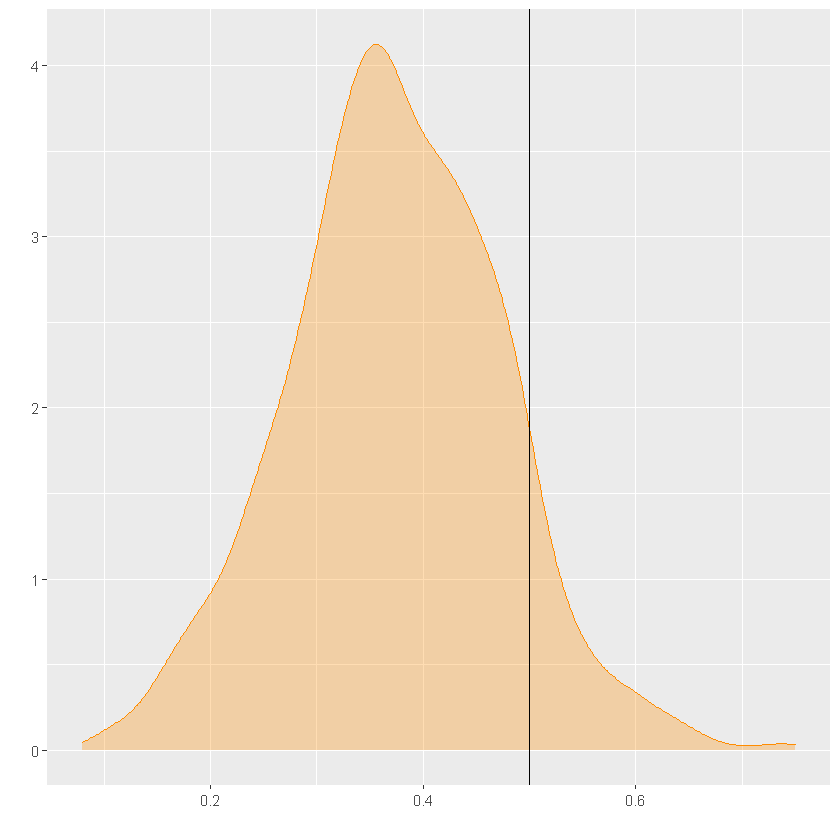

In [34]:
# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
#for (i_rep in seq_len(n_rep)) {
for (i_rep in seq_len(1)) {
    df = data[[i_rep]]
    obj_dml_data = double_ml_data_from_data_frame(df, y_col = "y", d_cols = "d")
    obj_dml_plr_nonorth = DoubleMLPLR$new(obj_dml_data,
                                          ml_g, ml_m,
                                          n_folds=2,
                                          score=non_orth_score,
                                          apply_cross_fitting=FALSE)
    obj_dml_plr_nonorth$fit()
    this_theta = obj_dml_plr_nonorth$coef
    print(abs(theta_nonorth[i_rep] - this_theta))
    theta_nonorth[i_rep] = this_theta
}

g_nonorth = ggplot(data.frame(theta_nonorth), aes(x = theta_nonorth)) +
                geom_density(fill = "dark orange", alpha = 0.3, color = "dark orange") +
                geom_vline(aes(xintercept = alpha), col = "black") +
                xlim(c(0.08, 0.75)) + xlab("") + ylab("") 
g_nonorth

The regularization bias in the simple ML-approach is caused by the slow convergence of  $\theta$

\begin{align}\begin{aligned}|\sqrt{n} (\hat{\theta} - \theta) | \rightarrow_{P} \infty \end{aligned}\end{align}

i.e., slower than $1/\sqrt{n}$. The driving factor is the bias that arises by learning  with a random forest or any other ML technique. A heuristic illustration is given by

\begin{align}\begin{aligned} \sqrt{n}(\hat{\theta} - \theta) = \underbrace{\left(\frac{1}{n} \sum_{i\in I} D_i^2\right)^{-1} \frac{1}{n} \sum_{i\in I} D_i \zeta_i}_{=:a} +  \underbrace{\left(\frac{1}{n} \sum_{i\in I} D_i^2\right)^{-1} \frac{1}{n} \sum_{i\in I} D_i (g_0(X_i) - \hat{g}_0(X_i))}_{=:b}. \end{aligned}\end{align}


 $a$ is approximately Gaussian under mild conditions. However, $b$ (the regularization bias) diverges in general.

# 1.4. Overcoming regularization bias by orthogonalization

To overcome the regularization bias we can partial out the effect of $X$ from $D$ to obtain the orthogonalized regressor $V = D - m(X)$ . We then use the final estimate

\begin{align}\begin{aligned} 
\check{\theta} = \left(\frac{1}{n} \sum_{i\in I} \hat{V}_i D_i\right)^{-1} \frac{1}{n} \sum_{i\in I} \hat{V}_i (Y_i - \hat{g}_0(X_i)).
\end{aligned}\end{align}

In [20]:
library(data.table)
lgr::get_logger("mlr3")$set_threshold("warn")
set.seed(2222)

# to speed up the illustration we hard-code the simulation results
theta_orth_nosplit = c(0.24404981, 0.24200765, 0.27908831, 0.25502043, 0.32824182, 0.26923132, 0.24104406, 0.20969115, 0.32043631, 0.19615339, 0.26752732, 0.28054535, 0.20565819, 0.23094579, 0.30052261, 0.22506210, 0.30899243, 0.33166896, 0.29901923, 0.21645924, 0.19363222, 0.25194347, 0.20642525, 0.24555231, 0.22453258, 0.30131307, 0.23932457, 0.24134974, 0.32292519, 0.24820202, 0.29051209, 0.19341549, 0.25560635, 0.24635088, 0.25058896, 0.19513198, 0.23325175, 0.25732967, 0.25630722, 0.23618513, 0.17672957, 0.21211532, 0.26970909, 0.23979100, 0.24278216, 0.31524081, 0.21496712, 0.23975950, 0.22430487, 0.25032633, 0.31171158, 0.28673753, 0.23617691, 0.30279132, 0.25171843, 0.21937215, 0.24240521, 0.23905356, 0.18858651, 0.20627836, 0.18322578, 0.25066665, 0.27527609, 0.27380098, 0.16270080, 0.22131889, 0.22989677, 0.25631445, 0.30572004, 0.28186739, 0.28453591, 0.31102750, 0.28063015, 0.25876131, 0.29582343, 0.24814810, 0.35109199, 0.25108377, 0.22487320, 0.30794975, 0.23894645, 0.26638033, 0.23674057, 0.20538273, 0.19608607, 0.33079935, 0.19395816, 0.21966814, 0.18736528, 0.21029872, 0.29902640, 0.26053716, 0.25603558, 0.21075900, 0.20782755, 0.28236968, 0.25193825, 0.28224143, 0.23540541, 0.26424208, 0.29290447, 0.24258066, 0.27822969, 0.20114274, 0.23819599, 0.25825846, 0.30886038, 0.21687679, 0.26809187, 0.29897851, 0.28606557, 0.25426056, 0.17297763, 0.22302356, 0.24706098, 0.24361315, 0.20613373, 0.20395747, 0.26581544, 0.27803372, 0.28981682, 0.28375231, 0.26902671, 0.22007559, 0.21972414, 0.22691012, 0.23230200, 0.19660759, 0.22971657, 0.24840646, 0.27392351, 0.23431585, 0.23109943, 0.22423472, 0.17548714, 0.27187182, 0.23154822, 0.23570134, 0.20276194, 0.20357300, 0.29668416, 0.23894281, 0.29103412, 0.26916173, 0.20825452, 0.27174241, 0.28702397, 0.26323370, 0.20993333, 0.22861364, 0.28225493, 0.25282767, 0.25466747, 0.20584595, 0.25209117, 0.26527392, 0.24857230, 0.30070528, 0.29237504, 0.28291041, 0.26424070, 0.20749123, 0.33763761, 0.17805976, 0.23412056, 0.31256005, 0.24081702, 0.24795085, 0.29925883, 0.25657520, 0.17849887, 0.27372626, 0.23904392, 0.22488373, 0.24942245, 0.29803576, 0.23674057, 0.27779304, 0.25638963, 0.22914358, 0.22338097, 0.23024613, 0.22301133, 0.29410433, 0.30106813, 0.27284832, 0.24042849, 0.24791942, 0.25071209, 0.25156142, 0.23516980, 0.24695011, 0.25794186, 0.27033305, 0.27898959, 0.22825721, 0.26305627, 0.28653743, 0.24861610, 0.29348304, 0.22902869, 0.30333429, 0.26935249, 0.19811759, 0.27767260, 0.19347321, 0.33130437, 0.25953422, 0.26075776, 0.17054191, 0.22197221, 0.26321300, 0.27792267, 0.20024470, 0.31713220, 0.23528659, 0.28108999, 0.21161821, 0.18928942, 0.25071159, 0.32293010, 0.18651541, 0.20749911, 0.22686192, 0.30217232, 0.27595429, 0.26376699, 0.28513188, 0.29005017, 0.22022413, 0.18666795, 0.18394129, 0.22996187, 0.29361925, 0.24450357, 0.29357722, 0.22286200, 0.28265768, 0.22675825, 0.27649261, 0.28951131, 0.28271866, 0.17806041, 0.21163621, 0.30509409, 0.26342174, 0.32677576, 0.24797358, 0.23200651, 0.27904545,
               0.26504825, 0.19402431, 0.26306555, 0.31078689, 0.24485790, 0.26520010, 0.21393591, 0.25235737, 0.23623305, 0.21269470, 0.36499369, 0.21848834, 0.28736613, 0.25397938, 0.25896726, 0.14757031, 0.15458744, 0.25966165, 0.29306232, 0.29959702, 0.34040452, 0.24615155, 0.16853516, 0.28525494, 0.23482806, 0.23951146, 0.26795442, 0.26138905, 0.28521849, 0.30644821, 0.22308750, 0.20662353, 0.26295613, 0.23490771, 0.20767176, 0.25672486, 0.23762899, 0.24988185, 0.21882009, 0.32730028, 0.31310884, 0.25821877, 0.23069627, 0.22345636, 0.19806570, 0.29756479, 0.21450103, 0.27358563, 0.24101731, 0.23376150, 0.22875492, 0.30380284, 0.27886358, 0.25644140, 0.27983788, 0.29336975, 0.20603135, 0.23124943, 0.25156872, 0.30053623, 0.27771452, 0.19847193, 0.25991230, 0.25088226, 0.25607595, 0.29055568, 0.20725805, 0.20844012, 0.26323932, 0.26251734, 0.29311885, 0.29691861, 0.28589456, 0.28678294, 0.23915972, 0.26246128, 0.24366650, 0.25425399, 0.31767331, 0.25261640, 0.21726079, 0.30237963, 0.22177598, 0.19588260, 0.23795208, 0.26311371, 0.28360425, 0.21153313, 0.17872878, 0.23587613, 0.25150900, 0.25867927, 0.26743636, 0.19428422, 0.24070189, 0.26749686, 0.21719999, 0.26282296, 0.23008293, 0.28084342, 0.22708225, 0.26011481, 0.25512443, 0.24929613, 0.26494690, 0.32442653, 0.24635223, 0.23136118, 0.29793829, 0.22573153, 0.20318348, 0.26693828, 0.24952603, 0.27215040, 0.26322105, 0.22329061, 0.27891631, 0.27127217, 0.27125980, 0.27248351, 0.22775018, 0.25404143, 0.25163026, 0.30982078, 0.20748986, 0.27073473, 0.23114844, 0.20224835, 0.30671944, 0.19242940, 0.24885178, 0.22356225, 0.29483575, 0.25740248, 0.18617692, 0.24523393, 0.25576838, 0.35176784, 0.25000509, 0.29496086, 0.18229425, 0.31624955, 0.21398406, 0.31201873, 0.27873516, 0.29288879, 0.21909350, 0.33838391, 0.28401419, 0.28814919, 0.25356693, 0.28313276, 0.29096662, 0.24443356, 0.27196073, 0.22707857, 0.23169359, 0.23623725, 0.29841002, 0.19643420, 0.22633211, 0.28084501, 0.26918329, 0.36923637, 0.21106338, 0.27083820, 0.23144420, 0.31389920, 0.22205859, 0.22125093, 0.26983642, 0.26984812, 0.27143384, 0.22440664, 0.24382201, 0.29489124, 0.27572998, 0.23011901, 0.21742103, 0.24521077, 0.24721123, 0.29630124, 0.29493903, 0.28724526, 0.27999346, 0.24368907, 0.22984274, 0.17392723, 0.27441598, 0.25581560, 0.22590773, 0.28188015, 0.22709537, 0.31067150, 0.32512125, 0.23057776, 0.30177850, 0.23242622, 0.28326166, 0.29190056, 0.25107901, 0.23130449, 0.24929647, 0.19796943, 0.26118980, 0.28361317, 0.28984450, 0.24239718, 0.23415392, 0.27891457, 0.31708859, 0.25101173, 0.24828103, 0.26219254, 0.26629355, 0.30090049, 0.21231956, 0.28541164, 0.31735485, 0.23788811, 0.21526438, 0.22865108, 0.26906438, 0.21838840, 0.26907421, 0.26570784, 0.20624892, 0.30029962, 0.34755127, 0.31459386, 0.28203083, 0.26903597, 0.29458419, 0.23009954, 0.24293185, 0.29547741, 0.22776509, 0.25928743, 0.27324063, 0.19938081, 0.34164972, 0.27462158, 0.22935702, 0.32378804, 0.25564062, 0.23829308, 0.17257210, 0.27254683, 0.20348844, 0.31883511,
               0.30223972, 0.28047451, 0.25603642, 0.27022816, 0.28062654, 0.25154276, 0.25218666, 0.26535623, 0.21176103, 0.21301494, 0.26220526, 0.27431630, 0.27729789, 0.24779401, 0.24868582, 0.18360005, 0.26786428, 0.24958852, 0.22578138, 0.27438830, 0.32905933, 0.31888969, 0.24873045, 0.28213371, 0.20563072, 0.24977431, 0.30339369, 0.24085435, 0.17003776, 0.25333376, 0.28797501, 0.30977813, 0.25259406, 0.30296617, 0.26677033, 0.22128846, 0.30456640, 0.24690890, 0.30914977, 0.33190582, 0.26943920, 0.32514576, 0.25079613, 0.28332654, 0.22076585, 0.27260810, 0.21275210, 0.32582630, 0.28814724, 0.22820021, 0.23679701, 0.26929291, 0.20674902, 0.21578408, 0.23102393, 0.19422745, 0.26693484, 0.24910152, 0.25459030, 0.28373457, 0.23307690, 0.22377395, 0.22574906, 0.29702891, 0.25427968, 0.21206913, 0.24253494, 0.23148299, 0.28956044, 0.27245119, 0.27969498, 0.21298051, 0.27298282, 0.26791011, 0.23978439, 0.26989927, 0.20125381, 0.26407324, 0.30557669, 0.22319726, 0.31493078, 0.22910660, 0.21667511, 0.23672426, 0.25941675, 0.29885728, 0.21517201, 0.28029613, 0.32394264, 0.27670934, 0.34767623, 0.25234206, 0.28996521, 0.27791141, 0.25572864, 0.24964783, 0.21480398, 0.28467806, 0.28029405, 0.19916957, 0.30238731, 0.25757664, 0.21437019, 0.22555528, 0.28787462, 0.30702164, 0.23218925, 0.23998290, 0.24108701, 0.19807579, 0.27532625, 0.29797673, 0.33230228, 0.24863314, 0.26096881, 0.31315212, 0.24171227, 0.25872465, 0.22154767, 0.27599649, 0.26455210, 0.23163402, 0.27558069, 0.27989725, 0.27851760, 0.21170799, 0.28618903, 0.19861032, 0.22324798, 0.30309738, 0.17963283, 0.26532334, 0.24133140, 0.26011628, 0.31859660, 0.22378082, 0.26713240, 0.27861435, 0.21975233, 0.32211484, 0.28379428, 0.24634791, 0.21500082, 0.24459111, 0.22421237, 0.25253544, 0.23511794, 0.30314989, 0.17381773, 0.25880032, 0.21234982, 0.23865437, 0.25171010, 0.30581337, 0.28307510, 0.28132029, 0.25098349, 0.24429769, 0.32528412, 0.24508261, 0.27625946, 0.26367128, 0.30872965, 0.24758068, 0.31172295, 0.24418416, 0.20467152, 0.23338737, 0.24866117, 0.27964005, 0.27014072, 0.30935446, 0.25824221, 0.27114065, 0.24802035, 0.22854418, 0.22945380, 0.21464254, 0.25982662, 0.30725683, 0.22635262, 0.24299934, 0.24783000, 0.31402718, 0.23889412, 0.29329641, 0.24323276, 0.25997723, 0.29938332, 0.21108355, 0.17714399, 0.23398678, 0.31824499, 0.22832691, 0.23374580, 0.23741578, 0.19794363, 0.19985305, 0.25941090, 0.33144872, 0.27671553, 0.23529043, 0.25156616, 0.21581062, 0.14069085, 0.28701229, 0.28376436, 0.25324103, 0.24521140, 0.26348733, 0.31471963, 0.27928279, 0.23140739, 0.24005349, 0.27719299, 0.22549446, 0.17181816, 0.26914335, 0.26147563, 0.23488390, 0.20516042, 0.23104556, 0.33939887, 0.22747521, 0.26699641, 0.26940843, 0.24175948, 0.27359773, 0.26232683, 0.27280967, 0.28311917, 0.24809043, 0.23792607, 0.29930390, 0.28970429, 0.20569726, 0.25444149, 0.33283531, 0.32671300, 0.25556005, 0.21977557, 0.21200236, 0.24466482, 0.21267102, 0.28793926, 0.21491347, 0.27112680, 0.27976902, 0.28284870, 0.25920649,
               0.27500549, 0.28002343, 0.30423065, 0.32924577, 0.17173157, 0.18553040, 0.23845241, 0.22745331, 0.32056756, 0.22080223, 0.29517097, 0.30737837, 0.25486917, 0.23718771, 0.28089043, 0.31238705, 0.25876756, 0.24292196, 0.22375197, 0.24283881, 0.35410498, 0.23368806, 0.19522686, 0.25769016, 0.25454050, 0.31319123, 0.17947042, 0.19190434, 0.30265186, 0.19946304, 0.30086939, 0.20109633, 0.25334314, 0.20911893, 0.28693220, 0.22298880, 0.27593279, 0.30214048, 0.26325374, 0.21294424, 0.27791242, 0.26954320, 0.29819193, 0.17927875, 0.23121506, 0.26231314, 0.25083801, 0.28033401, 0.26820107, 0.27022253, 0.22792994, 0.21512806, 0.30392373, 0.37016435, 0.31230905, 0.29721586, 0.27724949, 0.25459834, 0.15951586, 0.19782845, 0.21939142, 0.23747047, 0.24440075, 0.28495355, 0.29067143, 0.22289957, 0.19727838, 0.26182810, 0.26700056, 0.20850858, 0.22248073, 0.30294435, 0.28396686, 0.25325660, 0.28110754, 0.30402911, 0.25165942, 0.28631568, 0.21262876, 0.26504292, 0.23227707, 0.20243507, 0.24853321, 0.19272924, 0.26087873, 0.32408585, 0.21510694, 0.27491827, 0.25804386, 0.22382809, 0.30728360, 0.27347877, 0.24220788, 0.19617423, 0.24985472, 0.29069347, 0.32784967, 0.23223983, 0.28298148, 0.24628940, 0.30607884, 0.23767203, 0.20429131, 0.26093432, 0.22608648, 0.22543390, 0.23870808, 0.22717988, 0.30429532, 0.21939188, 0.24270492, 0.32245359, 0.30286073, 0.22104531, 0.22910319, 0.32607062, 0.21411771, 0.25257003, 0.24598362, 0.23180878, 0.27113287, 0.25057170, 0.19189994, 0.23257955, 0.27667730, 0.22466231, 0.25881201, 0.23175854, 0.24960139, 0.32826814, 0.28951057, 0.21486691, 0.17778950, 0.26021780, 0.27643750, 0.17872446, 0.28002911, 0.21805482, 0.38678121, 0.25471786, 0.21297770, 0.32726096, 0.28189860, 0.22361958, 0.28245412, 0.26690088, 0.30962131, 0.25677141, 0.23710782, 0.23152883, 0.27632201, 0.27235424, 0.21711356, 0.21794149, 0.20043823, 0.20760472, 0.20909603, 0.31225668, 0.27529778, 0.19133858, 0.24952837, 0.32137579, 0.25944996, 0.31970595, 0.24870416, 0.26509979, 0.26355110, 0.29517943, 0.34637904, 0.24146828, 0.28212012, 0.23472525, 0.24156734, 0.23788934, 0.24383514, 0.14396294, 0.33060120, 0.29607903, 0.20853050, 0.28021850, 0.23598870, 0.25251283, 0.26717264, 0.20898575, 0.24692804, 0.28417276, 0.21140865, 0.31535353, 0.25921238, 0.27417029, 0.26054656, 0.29587580, 0.20549704, 0.27341285, 0.29240708, 0.32059263, 0.23118675, 0.17993850, 0.26216515, 0.28442858, 0.23133134, 0.26663198, 0.33022619, 0.31993129, 0.30955249, 0.33249114, 0.29334380, 0.19866766, 0.30970885, 0.21414314, 0.18668980, 0.20812096, 0.27479207, 0.25533000, 0.24358777, 0.26188038, 0.25086771, 0.25654017, 0.22080933, 0.19350181, 0.25724694, 0.26805649, 0.13882816, 0.26080592, 0.27079933, 0.24554024, 0.23415862, 0.25285817, 0.27472101, 0.24890736, 0.35753835, 0.26952921, 0.22867552, 0.21595742, 0.25398338, 0.26967079, 0.27074357, 0.21771453, 0.28066849, 0.18347077, 0.24902906, 0.23107295, 0.35380816, 0.26439250, 0.23904248, 0.26452052, 0.28343627, 0.24538294, 0.25790816, 0.21900178)

          d 
0.008182472 


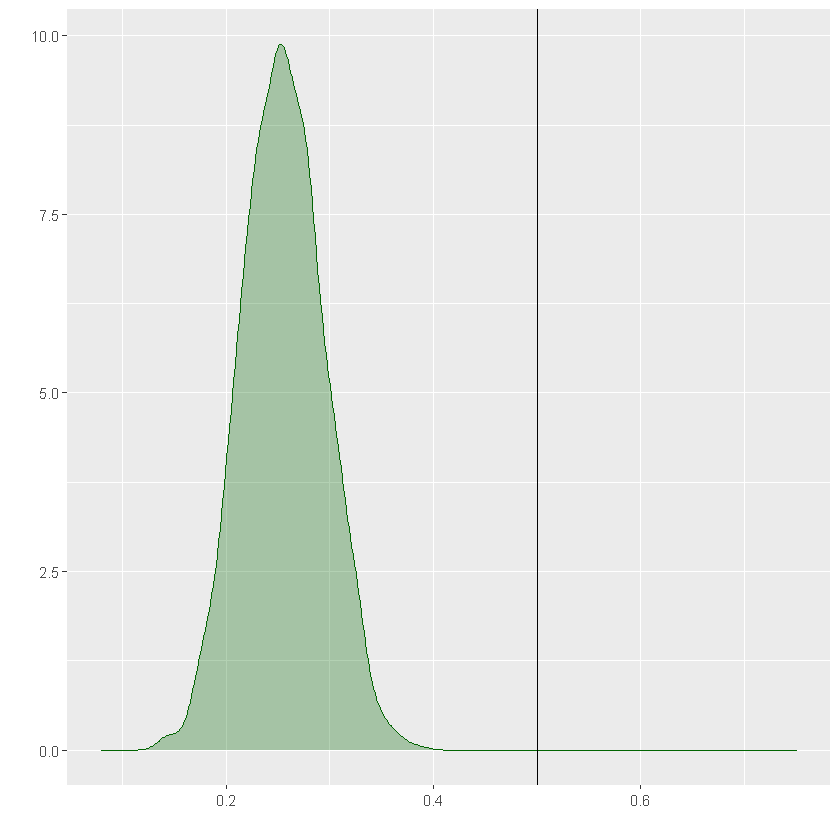

In [33]:
# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
#for (i_rep in seq_len(n_rep)){
for (i_rep in seq_len(1)) {
    df = data[[i_rep]]
    obj_dml_data = double_ml_data_from_data_frame(df, y_col = "y", d_cols = "d")
    obj_dml_plr_orth_nosplit = DoubleMLPLR$new(obj_dml_data,
                                           ml_g, ml_m,
                                           n_folds=1,
                                           score='IV-type',
                                           apply_cross_fitting=FALSE)
    obj_dml_plr_orth_nosplit$fit()
    this_theta = obj_dml_plr_orth_nosplit$coef
    print(abs(theta_orth_nosplit[i_rep] - this_theta))
    theta_orth_nosplit[i_rep] = this_theta
}

g_nosplit = ggplot(data.frame(theta_orth_nosplit), aes(x = theta_orth_nosplit)) +
            geom_density(fill = "dark green", alpha = 0.3, color = "dark green") +
            geom_vline(aes(xintercept = alpha), col = "black") +
            xlim(c(0.08, 0.75)) + xlab("") + ylab("") 
g_nosplit

# 1.5. Sample splitting to remove bias induced by overfitting

Using sample splitting, i.e., estimate the nuisance models $\hat{g}_0()$ and  $\hat{m}()$
 on one part of the data (training data) and estimate $\check{\theta}$ on the other part of the data (test data), overcomes the bias induced by overfitting. We can exploit the benefits of cross-fitting by switching the role of the training and test sample. Cross-fitting performs well empirically because the entire sample can be used for estimation.

           d 
3.479779e-09 


Warning message:
"Removed 1 rows containing non-finite values (stat_density)."


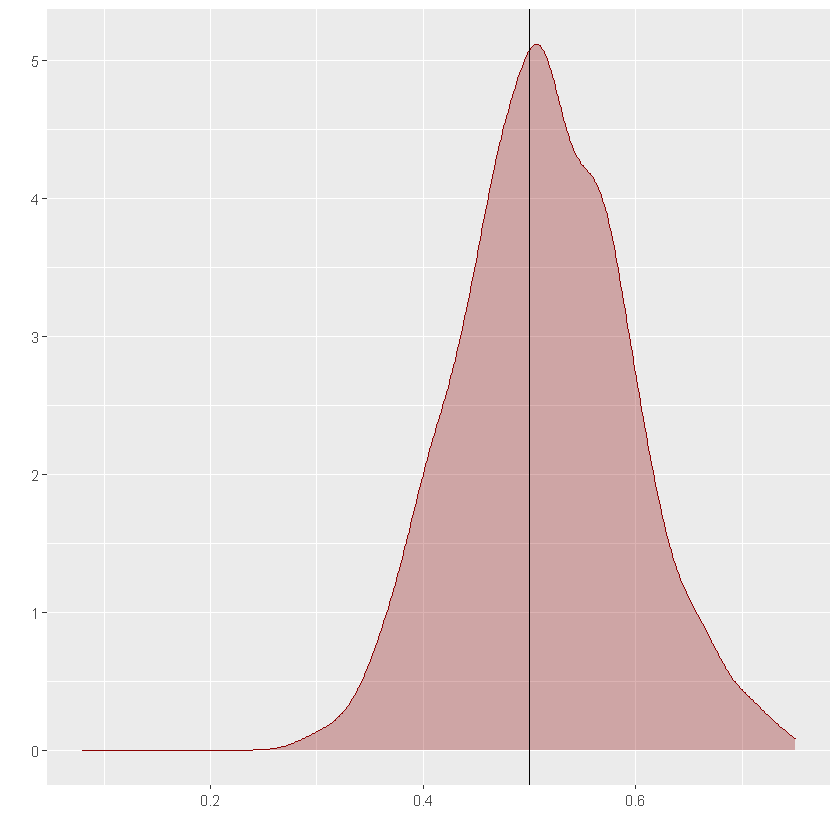

In [32]:
set.seed(3333)

# to speed up the illustration we hard-code the simulation results
theta_dml = c(0.42913806, 0.43316824, 0.61369310, 0.47420288, 0.56612731, 0.48624066, 0.48266824, 0.42687167, 0.57932496, 0.35014429, 0.45364242, 0.50362907, 0.35426940, 0.50631755, 0.69905326, 0.44184129, 0.68664042, 0.65077473, 0.54085236, 0.53393103, 0.41080641, 0.55493858, 0.38648321, 0.50326788, 0.47792825, 0.52250731, 0.45095439, 0.51617920, 0.72629732, 0.44585236, 0.57614603, 0.40003120, 0.56031886, 0.51314163, 0.51161077, 0.42458006, 0.45470411, 0.62995282, 0.52821749, 0.52106290, 0.41796137, 0.49244195, 0.44735716, 0.47464688, 0.43278999, 0.57738025, 0.46497964, 0.51932182, 0.41720577, 0.43764400, 0.67841266, 0.55408659, 0.51307914, 0.68270399, 0.59202605, 0.56587065, 0.54677982, 0.53995167, 0.40541990, 0.43919669, 0.41382584, 0.60354425, 0.47532433, 0.57520404, 0.34593387, 0.44649214, 0.47314742, 0.65742616, 0.57004944, 0.58934731, 0.57040034, 0.64863370, 0.55508407, 0.56819856, 0.52013619, 0.46425486, 0.62237868, 0.51925107, 0.52501949, 0.62183034, 0.51362139, 0.50258909, 0.53324487, 0.37252394, 0.50511082, 0.56329268, 0.46591064, 0.46891112, 0.36117298, 0.40960975, 0.56476302, 0.60346171, 0.55011963, 0.43666665, 0.43957066, 0.59957770, 0.49008623, 0.67188050, 0.57097026, 0.60687472, 0.60862364, 0.50827286, 0.50359364, 0.30725406, 0.40085167, 0.50973296, 0.55199812, 0.49537286, 0.45188790, 0.56682157, 0.60075966, 0.55716112, 0.36188043, 0.42720108, 0.48913582, 0.49905466, 0.30636339, 0.37399033, 0.47361759, 0.55287262, 0.67421189, 0.65452966, 0.70761480, 0.41981470, 0.48624085, 0.46167888, 0.45667825, 0.47723405, 0.45471222, 0.47466022, 0.52806844, 0.55456203, 0.35834979, 0.48054982, 0.40626663, 0.53222057, 0.50406679, 0.61914153, 0.45274682, 0.38146984, 0.55040314, 0.51683918, 0.62819509, 0.56447129, 0.40844310, 0.56361326, 0.59545085, 0.54341239, 0.38600811, 0.48514795, 0.61624648, 0.52223771, 0.50694287, 0.40784649, 0.43925088, 0.56120925, 0.53709777, 0.53361594, 0.60162763, 0.55301727, 0.57168732, 0.40383638, 0.61029386, 0.32967098, 0.44418344, 0.59388784, 0.48403921, 0.43563524, 0.57586206, 0.54438640, 0.39391988, 0.54026644, 0.50304476, 0.45330140, 0.51772101, 0.57072679, 0.47129530, 0.52952563, 0.51118177, 0.43792613, 0.50708501, 0.55402204, 0.56300018, 0.64710173, 0.61068413, 0.50885259, 0.46867644, 0.51529826, 0.54432131, 0.44366517, 0.47907430, 0.48360119, 0.46415220, 0.62803625, 0.51681093, 0.44861562, 0.46878897, 0.57754910, 0.53934414, 0.55514825, 0.64211494, 0.58543153, 0.56421745, 0.41812980, 0.61842351, 0.39951353, 0.65326039, 0.59645961, 0.49958845, 0.39999194, 0.48458269, 0.57670828, 0.48991088, 0.46882587, 0.56076353, 0.45412254, 0.57411999, 0.44973420, 0.38673987, 0.49782242, 0.60652263, 0.32827752, 0.40505171, 0.52913411, 0.58860288, 0.54656647, 0.59747115, 0.50592872, 0.60282387, 0.34342820, 0.38265266, 0.37658983, 0.46327940, 0.45987841, 0.47207120, 0.62249832, 0.49486043, 0.48560421, 0.42329878, 0.43797319, 0.53221423, 0.49708016, 0.39947860, 0.37220067, 0.62247380, 0.51071511, 0.73578123, 0.49977786, 0.47002894, 0.55606379,
      0.60036521, 0.37144821, 0.56061871, 0.58470561, 0.52377130, 0.47195886, 0.46082198, 0.54618085, 0.51661456, 0.40254820, 0.79526518, 0.47619727, 0.64471049, 0.48303118, 0.50388135, 0.34803997, 0.35489409, 0.48573732, 0.56607696, 0.55677069, 0.66452679, 0.47796660, 0.36815952, 0.49030185, 0.46802058, 0.49364717, 0.53806177, 0.63226813, 0.41949031, 0.61031602, 0.52203176, 0.45365217, 0.52340408, 0.38941021, 0.41657998, 0.46790560, 0.51640168, 0.52023209, 0.41658159, 0.62603226, 0.64976888, 0.55140079, 0.40168700, 0.48450186, 0.37489314, 0.57126164, 0.42998898, 0.46747086, 0.46207941, 0.42358173, 0.40508553, 0.60585155, 0.55732323, 0.49555698, 0.52873767, 0.66544607, 0.42496742, 0.47372355, 0.45987312, 0.56542595, 0.55594871, 0.39854807, 0.47535006, 0.47627848, 0.50834030, 0.53412860, 0.35496264, 0.38224096, 0.53455446, 0.53345455, 0.51537376, 0.56669332, 0.61729402, 0.56773772, 0.51540255, 0.46143092, 0.46263424, 0.47306752, 0.71764595, 0.44831611, 0.44472624, 0.54153129, 0.45992811, 0.41468665, 0.50693472, 0.53712667, 0.50115649, 0.41561605, 0.39845802, 0.57098662, 0.47668312, 0.53814574, 0.54558775, 0.36989976, 0.57058142, 0.59245627, 0.39453265, 0.55638448, 0.41792649, 0.50174815, 0.42716142, 0.57053877, 0.50450045, 0.50719061, 0.40791363, 0.60117304, 0.50726098, 0.41313999, 0.62713006, 0.52927468, 0.43919127, 0.51939909, 0.53216099, 0.61426638, 0.55517891, 0.52550725, 0.48726381, 0.52282488, 0.53412265, 0.57112127, 0.44915620, 0.48624981, 0.45434757, 0.54594964, 0.45144261, 0.58943593, 0.44173928, 0.39137041, 0.56532290, 0.52862947, 0.59335260, 0.47949536, 0.59270141, 0.60803178, 0.44201101, 0.50200628, 0.57736589, 0.67365436, 0.47965685, 0.53265149, 0.29539617, 0.63942053, 0.36842280, 0.60947176, 0.52338164, 0.59342733, 0.49698428, 0.69892615, 0.63637029, 0.47600661, 0.50267946, 0.52290767, 0.51826972, 0.53976759, 0.49725101, 0.51986060, 0.55680582, 0.53644020, 0.56394591, 0.41015781, 0.56109820, 0.54985548, 0.48015589, 0.70643971, 0.50029105, 0.57595621, 0.51223989, 0.62096412, 0.44081326, 0.39901139, 0.55241395, 0.51862525, 0.57115813, 0.44345708, 0.54100182, 0.51750750, 0.51221937, 0.44313306, 0.46866454, 0.54853286, 0.45596388, 0.60353598, 0.59485756, 0.51394737, 0.52571069, 0.51710424, 0.45414012, 0.37452561, 0.48179420, 0.48400926, 0.54266013, 0.62673309, 0.51523876, 0.70196700, 0.70896770, 0.46851214, 0.59934315, 0.50147654, 0.49531880, 0.50256030, 0.63738873, 0.44100607, 0.50199621, 0.50267163, 0.57522836, 0.54297195, 0.59369577, 0.47387198, 0.46236344, 0.55472654, 0.64741476, 0.56064831, 0.48637194, 0.48030544, 0.55182318, 0.59873158, 0.38704244, 0.49207536, 0.61636373, 0.49309616, 0.43057533, 0.42656903, 0.57737717, 0.47652448, 0.44508640, 0.55721658, 0.42001502, 0.53203807, 0.67786061, 0.56307312, 0.59090498, 0.46763688, 0.60226755, 0.51045486, 0.58261018, 0.51335751, 0.51489954, 0.49543312, 0.54261570, 0.37144113, 0.56424704, 0.52789051, 0.62629321, 0.56680133, 0.58094908, 0.56792576, 0.38076462, 0.51025326, 0.41766390, 0.67992174,
      0.57048006, 0.55394699, 0.57142484, 0.50051587, 0.53052551, 0.59685925, 0.57857539, 0.66474049, 0.40036740, 0.45197943, 0.48545635, 0.58707913, 0.52364072, 0.53642783, 0.50616922, 0.38669512, 0.53221757, 0.44462522, 0.56490506, 0.52281451, 0.61329588, 0.53618070, 0.54026911, 0.57958907, 0.44172998, 0.54616971, 0.49559402, 0.46337158, 0.40539251, 0.48660211, 0.52950782, 0.67319498, 0.50960922, 0.55025810, 0.48466318, 0.48733741, 0.57079932, 0.52210722, 0.59483531, 0.57823919, 0.56681829, 0.67063110, 0.55044265, 0.49411047, 0.49592631, 0.53839330, 0.50303196, 0.57088299, 0.53512485, 0.45772366, 0.52151506, 0.58684530, 0.41629452, 0.48724706, 0.49347072, 0.44468953, 0.62079071, 0.45174209, 0.50964193, 0.57956285, 0.46846437, 0.45610451, 0.46687298, 0.56776141, 0.50069025, 0.47016823, 0.52769089, 0.48033467, 0.47567157, 0.51580042, 0.54601488, 0.44649238, 0.52159010, 0.58909856, 0.44350571, 0.47345207, 0.47027266, 0.52040233, 0.56983877, 0.47086448, 0.53872263, 0.44996677, 0.47074500, 0.42960621, 0.52333355, 0.58375512, 0.46329712, 0.49498312, 0.59458654, 0.50953637, 0.63728315, 0.50204231, 0.59437553, 0.52019228, 0.47574961, 0.43201755, 0.44222095, 0.53067411, 0.55695602, 0.40546530, 0.51287913, 0.52125397, 0.42011085, 0.44796920, 0.66000531, 0.55670752, 0.47266941, 0.49879186, 0.57275709, 0.46730920, 0.61246393, 0.56723568, 0.61656772, 0.53631019, 0.57331834, 0.57269018, 0.46993462, 0.49854259, 0.39883510, 0.57493417, 0.51821134, 0.43730615, 0.54825472, 0.64819963, 0.48815339, 0.47117569, 0.58801247, 0.38179558, 0.49153756, 0.53372616, 0.39952425, 0.54495609, 0.56425681, 0.60914698, 0.67661682, 0.43440964, 0.47919319, 0.50718258, 0.51064880, 0.73991197, 0.58496491, 0.59005490, 0.46279519, 0.58139833, 0.48246194, 0.47157441, 0.51921259, 0.59101700, 0.40841472, 0.57875099, 0.40205734, 0.52224831, 0.51818062, 0.53313627, 0.61172011, 0.49113850, 0.43693161, 0.46919091, 0.63009573, 0.55165641, 0.64606963, 0.55488746, 0.54408366, 0.38395325, 0.55924915, 0.51209453, 0.39222947, 0.44400452, 0.45858189, 0.50094515, 0.54827255, 0.61142796, 0.50540355, 0.50289919, 0.52269712, 0.44278828, 0.54354751, 0.40389553, 0.48896288, 0.51261510, 0.59240684, 0.57118052, 0.51133825, 0.70668058, 0.55364559, 0.56129073, 0.42279244, 0.51104222, 0.50439600, 0.40569372, 0.47728061, 0.43199642, 0.70508883, 0.41362643, 0.54311643, 0.44714492, 0.42709630, 0.37506699, 0.47275717, 0.65199031, 0.55824739, 0.47710929, 0.52287265, 0.46701169, 0.34957259, 0.57366553, 0.61544005, 0.57923248, 0.48491284, 0.67073890, 0.59296263, 0.52960127, 0.48830529, 0.42371237, 0.53493779, 0.46803035, 0.35813584, 0.63742714, 0.53100854, 0.48004508, 0.38527609, 0.45555077, 0.61923367, 0.45278751, 0.55398663, 0.54611470, 0.47799756, 0.62941151, 0.53417734, 0.48169190, 0.57393957, 0.56965073, 0.48438376, 0.59291956, 0.58419322, 0.40210205, 0.40705906, 0.60354322, 0.66776203, 0.47749758, 0.51099112, 0.41384870, 0.50893890, 0.44254692, 0.52634243, 0.48099904, 0.58424289, 0.59455376, 0.69857315, 0.52939985,
      0.51870330, 0.52861707, 0.56935708, 0.65242725, 0.33287675, 0.36760792, 0.44377420, 0.56422963, 0.60120575, 0.41819252, 0.56997243, 0.60729652, 0.53456727, 0.49915985, 0.49840749, 0.54267287, 0.54345681, 0.51760500, 0.36975586, 0.53025333, 0.66200912, 0.50074647, 0.40370975, 0.50420793, 0.44299858, 0.58169330, 0.37495283, 0.35753936, 0.61401972, 0.38445478, 0.66316660, 0.39712808, 0.60481713, 0.43205297, 0.60673487, 0.36795722, 0.58504703, 0.59312592, 0.50726682, 0.43250603, 0.59993261, 0.50850652, 0.55197866, 0.42100227, 0.41197278, 0.48603494, 0.48233252, 0.52166479, 0.48123320, 0.57925253, 0.45858549, 0.44852927, 0.63552822, 0.67505307, 0.64072903, 0.58062243, 0.53493671, 0.57334320, 0.41484093, 0.50335731, 0.47572475, 0.62807268, 0.51276249, 0.48341935, 0.57002321, 0.42448958, 0.46463977, 0.50158529, 0.50336207, 0.38493723, 0.49877225, 0.70920972, 0.52804881, 0.55241536, 0.51123088, 0.56935502, 0.46794885, 0.62160760, 0.47682064, 0.55061002, 0.45601717, 0.32226202, 0.50512015, 0.39238552, 0.51890464, 0.56729508, 0.48812630, 0.52579096, 0.49552910, 0.45541965, 0.57388623, 0.55532925, 0.42905776, 0.42528833, 0.50058720, 0.57588967, 0.58886503, 0.45381248, 0.50284578, 0.44971131, 0.55089234, 0.50441897, 0.46913765, 0.49684019, 0.48161077, 0.55911804, 0.50199758, 0.47945146, 0.66388549, 0.39635503, 0.53354409, 0.64561425, 0.66166898, 0.47160421, 0.50143847, 0.64010436, 0.46946532, 0.52131207, 0.53527948, 0.47010874, 0.51834605, 0.54124221, 0.40402007, 0.50168993, 0.50234726, 0.40501895, 0.47435409, 0.39967228, 0.58627553, 0.63872443, 0.51361588, 0.47086834, 0.44200927, 0.54694174, 0.53323022, 0.34121376, 0.46739575, 0.42969545, 0.70104546, 0.46003349, 0.51258474, 0.72598733, 0.50390373, 0.50638444, 0.50122981, 0.51856086, 0.58824995, 0.56395614, 0.58458643, 0.48689805, 0.54648130, 0.46113281, 0.42569036, 0.51534597, 0.42647065, 0.36155963, 0.39515078, 0.59939998, 0.49517795, 0.43462746, 0.47664938, 0.56940909, 0.57171369, 0.60772723, 0.48845162, 0.64587916, 0.51106531, 0.56538809, 0.61896522, 0.45928391, 0.55184185, 0.59693194, 0.59348120, 0.43120609, 0.54165183, 0.31393692, 0.74020994, 0.58668672, 0.44618824, 0.58408901, 0.50309948, 0.50841443, 0.51478630, 0.48087840, 0.51480573, 0.50754975, 0.46715053, 0.58687497, 0.57562903, 0.56412152, 0.49320614, 0.48217559, 0.45551353, 0.50503672, 0.44996034, 0.63371039, 0.51740116, 0.41814389, 0.47413265, 0.55776780, 0.45872666, 0.59620842, 0.65898842, 0.65894305, 0.56710870, 0.60647653, 0.54772268, 0.42489299, 0.58600208, 0.33854023, 0.35980618, 0.43478661, 0.56196962, 0.60073501, 0.43790578, 0.39961190, 0.50526949, 0.49429539, 0.42253674, 0.42425078, 0.62641974, 0.43744788, 0.28745392, 0.49301899, 0.54976290, 0.51968761, 0.51677942, 0.52912944, 0.47229849, 0.47875525, 0.62221667, 0.58038527, 0.45193207, 0.47508698, 0.43425117, 0.45337453, 0.50681186, 0.45026174, 0.55684403, 0.39043084, 0.45808880, 0.39807946, 0.67317732, 0.48568494, 0.50180223, 0.61079194, 0.58155068, 0.55683503, 0.53079425, 0.44263915)

# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
#for (i_rep in seq_len(n_rep)) {
for (i_rep in seq_len(1)) {
    df = data[[i_rep]]
    obj_dml_data = double_ml_data_from_data_frame(df, y_col = "y", d_cols = "d")
    obj_dml_plr = DoubleMLPLR$new(obj_dml_data,
                              ml_g, ml_m,
                              n_folds=2,
                              score='IV-type')
    obj_dml_plr$fit()
    this_theta = obj_dml_plr$coef
    print(abs(theta_dml[i_rep] - this_theta))
    theta_dml[i_rep] = this_theta
}

g_dml = ggplot(data.frame(theta_dml), aes(x = theta_dml)) +
            geom_density(fill = "dark red", alpha = 0.3, color = "dark red") +
            geom_vline(aes(xintercept = alpha), col = "black") +
            xlim(c(0.08, 0.75)) + xlab("") + ylab("") 
g_dml

# 1.6. Double/debiased machine learning

To illustrate the benefits of the auxiliary prediction step in the DML framework we write the error as

\begin{align}\begin{aligned} 
\sqrt{n}(\check{\theta} - \theta) = a^* + b^* + c^*
\end{aligned}\end{align}

Chernozhukov et al. (2018) argues that:

The first term

\begin{align}\begin{aligned} 
a^* := (EV^2)^{-1} \frac{1}{\sqrt{n}} \sum_{i\in I} V_i \zeta_i
\end{aligned}\end{align}

will be asymptotically normally distributed.

The second term

\begin{align}\begin{aligned} 
b^* := (EV^2)^{-1} \frac{1}{\sqrt{n}} \sum_{i\in I} (\hat{m}(X_i) - m(X_i)) (\hat{g}_0(X_i) - g_0(X_i))
\end{aligned}\end{align}


vanishes asymptotically for many data generating processes.

The third term $c^*$
 vanishes in probability if sample splitting is applied.

Warning message:
"Removed 47 rows containing non-finite values (stat_density)."
Warning message:
"Removed 3 rows containing non-finite values (stat_density)."
Warning message:
"Removed 1 rows containing non-finite values (stat_density)."


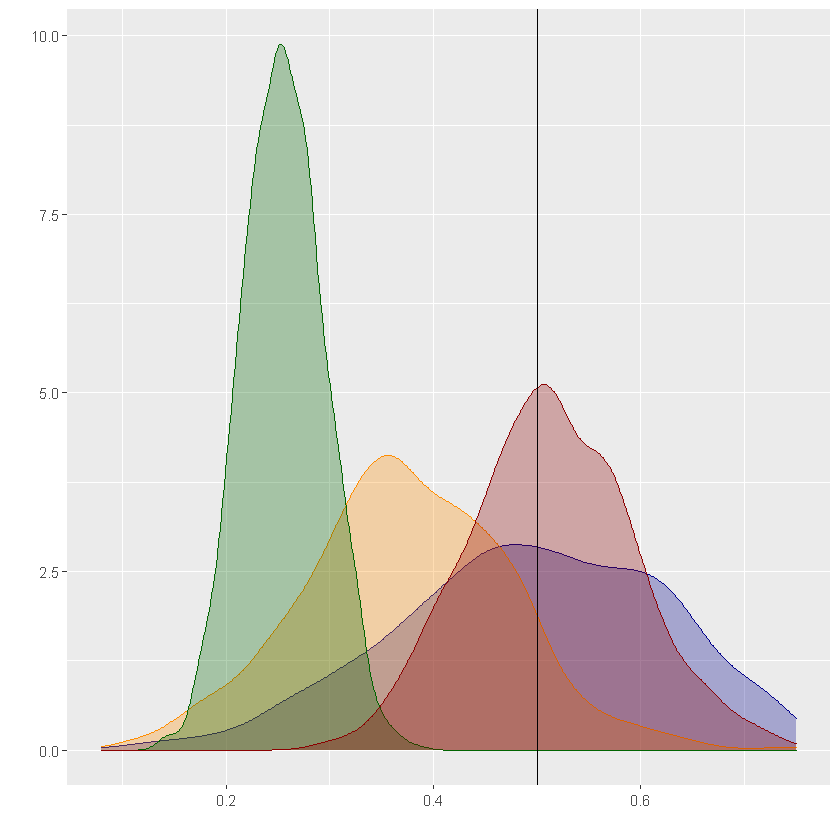

In [51]:

g_all = ggplot(data.frame(theta_ols, theta_nonorth, theta_orth_nosplit, theta_dml)) +
            geom_density(aes(x = theta_ols, color="OLS"), fill = "dark blue", alpha = 0.3, color = "dark blue") +
            geom_density(aes(x = theta_nonorth, color = "Non-orthogonal ML"), fill = "dark orange", alpha = 0.3, color = "dark orange") +
            geom_density(aes(x = theta_orth_nosplit, color = "Double ML (no sample splitting)"), fill = "dark green", alpha = 0.3, color = "dark green") +
            geom_density(aes(x = theta_dml, color = "Double ML with cross-fitting"), fill = "dark red", alpha = 0.3, color = "dark red") +
            geom_vline(aes(xintercept = alpha), col = "black") +  
            xlim(c(0.08, 0.75)) + xlab("") + ylab("") + 
            theme(legend.position = 'right') + scale_color_manual(name = 'Methods',
                                                                   breaks = c('OLS','Non-orthogonal ML','Double ML (no sample splitting)','Double ML with cross-fitting'),
                                                                   values = c('OLS'='dark blue','Non-orthogonal ML'='dark orange','Double ML (no sample splitting)'='dark green','Double ML with cross-fitting'='dark red'))
g_all

# 1.7. References

Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W. and Robins, J. (2018), Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, 21: C1-C68. doi:10.1111/ectj.12097.